In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

url = 'pca_iris.data'
df = pd.read_csv(url,names=['sepalLenght','sepalWidth','petalLenght','petalWidth','target'])

df

,sepalLenght,sepalWidth,petalLenght,petalWidth,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
features = ['sepalLenght','sepalWidth','petalLenght','petalWidth']
# bagimsizlari ayiralim
x = df[features]
# sonuclari yani targeti ayiralim
y = df[['target']]

In [11]:
# scale edelim (normalize etmeden farkli) 
x = StandardScaler().fit_transform(x)

In [12]:
x

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [30]:
# eldeki verilerimizi 4 data sutunundan 2 ye indirecegiz ama bu indirme islemi iki tanesi atip diger ikisini kullanmak degil
# yeni sutunlar diger degerlere gore yapilan iki deger olacak ozelllik1 ve ozellik2 diye 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=principalComponents,columns=['principalComponent1','principalComponent2'])

In [31]:
principalDf

,principalComponent1,principalComponent2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767
...,...,...
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362


In [32]:
# yeni datalarla sonuclari bir df de birlesirelim

finalDf = pd.concat([principalDf,df[['target']]],axis=1)

In [33]:
finalDf.head()

,principalComponent1,principalComponent2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


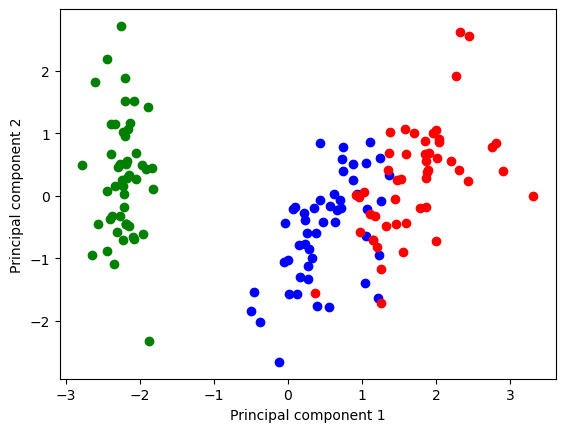

In [35]:
# grafik olarak cizelim
targets = ['Iris-setosa','Iris-versicolor','Iris-virginica']
colors = ['g','b','r']
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

for targets,col in zip(targets,colors):
    dftemp = finalDf[df.target==targets]
    plt.scatter(dftemp['principalComponent1'],dftemp['principalComponent2'],color=col)